<h2>Import thư viện

In [1]:
# Thư viện đọc file và chuyển kiểu
import pandas as pd
import numpy as np

# Đổi kiểu dữ liệu datetime
import datetime as dt

# Import các thư viện train
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import sklearn để tính toán các giá trị cũng như scaled dataset
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
from sklearn.preprocessing import MinMaxScaler

# Thư viện trực quan hóa dữ liệu
import matplotlib.pyplot as plt
%matplotlib inline

<h2>Đọc dữ liệu

In [2]:
# Đọc dữ liệu từ file csv
df = pd.read_csv('./dataset/NTR.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,46.209999,46.990002,45.855000,46.259998,40.076603,1289100
1,2019-01-03,46.000000,46.099998,44.882999,45.049999,39.028336,1158800
2,2019-01-04,45.950001,47.180000,45.880001,47.130001,40.830311,1538500
3,2019-01-07,47.310001,48.110001,46.840000,47.740002,41.358780,954700
4,2019-01-08,48.709999,49.480000,48.520000,49.209999,42.632290,1921800
5,2019-01-09,49.689999,49.689999,48.779999,49.410000,42.805561,1839700
6,2019-01-10,49.070000,50.080002,48.560001,50.049999,43.360016,1808100
7,2019-01-11,49.799999,50.139999,49.279999,49.869999,43.204063,826500
8,2019-01-14,49.430000,50.130001,49.200001,49.680000,43.039471,763400
9,2019-01-15,49.869999,50.160000,49.200001,49.669998,43.030796,898100


In [3]:
# Chuyển đổi cột thuộc tính 'Date' về dạng DateTime
df['Date'] = pd.to_datetime(df['Date'])

# Chọn thuộc tính 'Date' làm Index
df.set_index('Date', inplace=True)

In [4]:
# Xem các dòng dữ liệu vừa được thêm vào
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,46.209999,46.990002,45.855000,46.259998,40.076603,1289100
2019-01-03,46.000000,46.099998,44.882999,45.049999,39.028336,1158800
2019-01-04,45.950001,47.180000,45.880001,47.130001,40.830311,1538500
2019-01-07,47.310001,48.110001,46.840000,47.740002,41.358780,954700
2019-01-08,48.709999,49.480000,48.520000,49.209999,42.632290,1921800
...,...,...,...,...,...,...
2023-05-26,56.849998,56.900002,55.790001,55.889999,55.889999,3027700
2023-05-30,56.040001,56.270000,53.805000,54.430000,54.430000,4421300
2023-05-31,53.930000,53.970001,52.349998,52.700001,52.700001,4043300


<h2> Mô tả tập dữ liệu

In [5]:
# Các độ đo về các thuộc tính của tập dữ liệu
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1.113000e+03
mean,60.527728,61.390447,59.638964,60.507996,57.282885,2.074894e+06
std,18.465554,18.880184,18.051778,18.476367,19.416189,1.209581e+06
min,24.820000,26.750999,23.848000,25.100000,22.519356,4.274000e+05
25%,48.500000,48.939999,48.119999,48.470001,43.079746,1.294700e+06
50%,55.360001,55.930000,54.549999,55.139999,52.403740,1.753500e+06
75%,73.580002,74.629997,72.489998,73.699997,72.680000,2.562700e+06
max,113.760002,117.250000,111.910004,114.500000,111.642052,1.133740e+07


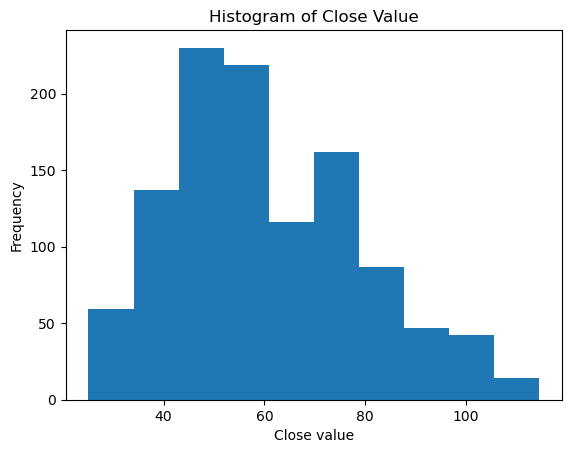

In [6]:
# Vẽ biểu đồ Histogram
plt.hist(df['Close'])

# Thiết lập label và title
plt.xlabel('Close value')
plt.ylabel('Frequency')
plt.title('Histogram of Close Value')

# Hiển thị biểu đồ histogram
plt.show()

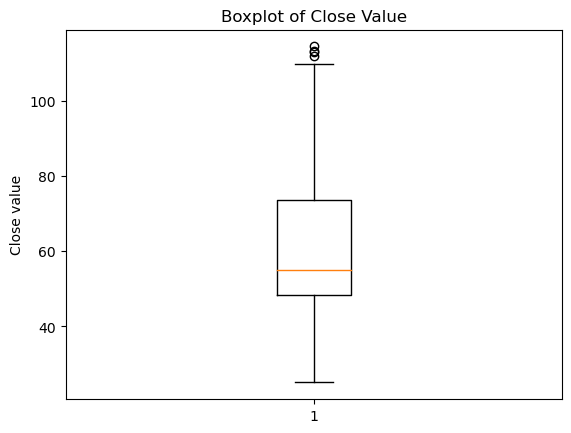

In [7]:
# Vẽ biểu đồ boxplot
plt.boxplot(df.Close)

# Thiết lập label và title
plt.title("Boxplot of Close Value")
plt.ylabel("Close value")

# Hiển thị biểu đồ box plot
plt.show()

<h2> Scale dữ liệu và phân chia các tập dữ liệu train, validation và test

In [8]:
#Lấy cột thuộc tính 'Close'
data = df['Close'].values

In [9]:
# Scale dữ liệu
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.reshape(-1, 1))

In [10]:
# Chia dữ liệu thành tập train, validation và test theo tỉ lệ 7:2:1
train_size = int(len(data_scaled) * 0.7)
val_size = int(len(data_scaled) * 0.2)
test_size = len(data_scaled) - train_size - val_size

train_data = data_scaled[0 : train_size, :]
val_data = data_scaled[train_size : train_size + val_size, :]
test_data = data_scaled[train_size + val_size : len(data_scaled), :]

In [11]:
sequence_length = 30 #sử dụng 30 ngày trước đó để dự đoán ngày tiếp theo 

def add_data(data, sequence_length):
    X, Y = [], []
    for i in range(len(data) - sequence_length - 1):
        X.append(data[i : (i + sequence_length), :])
        Y.append(data[i + sequence_length, 0])
    return np.array(X), np.array(Y)

# Thêm dữ liệu cho tập train, validation và test
X_train, y_train = add_data(train_data, sequence_length)
X_test, y_test = add_data(test_data, sequence_length)
X_val, y_val = add_data(val_data, sequence_length)

<h2>Xây dựng mô hình


In [12]:
model = Sequential() #Đóng gói trình tự của các layer bên trong

#4 lớp LSTM
#Dropout: tránh việc nhớ quá nhiều thông tin => vô hiệu hóa một phần dữ liệu trước đó
model.add(LSTM(units = 50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))

#1 lớp Dense (dày đặc)
model.add(Dense(units=1)) #1: 1 đơn vị cung cấp giá trị dự đoán

#Tối ưu hóa mô hình bằng adam
model.compile(optimizer = 'adam',loss='mean_squared_error')

<h2>Huấn luyện mô hình

In [13]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=2)

Epoch 1/50
24/24 - 15s - loss: 0.0165 - val_loss: 0.0213 - 15s/epoch - 620ms/step
Epoch 2/50
24/24 - 2s - loss: 0.0033 - val_loss: 0.0075 - 2s/epoch - 82ms/step
Epoch 3/50
24/24 - 2s - loss: 0.0024 - val_loss: 0.0075 - 2s/epoch - 80ms/step
Epoch 4/50
24/24 - 7s - loss: 0.0021 - val_loss: 0.0073 - 7s/epoch - 287ms/step
Epoch 5/50
24/24 - 6s - loss: 0.0020 - val_loss: 0.0075 - 6s/epoch - 252ms/step
Epoch 6/50
24/24 - 3s - loss: 0.0021 - val_loss: 0.0076 - 3s/epoch - 121ms/step
Epoch 7/50
24/24 - 3s - loss: 0.0020 - val_loss: 0.0078 - 3s/epoch - 122ms/step
Epoch 8/50
24/24 - 3s - loss: 0.0021 - val_loss: 0.0065 - 3s/epoch - 113ms/step
Epoch 9/50
24/24 - 3s - loss: 0.0020 - val_loss: 0.0059 - 3s/epoch - 124ms/step
Epoch 10/50
24/24 - 2s - loss: 0.0019 - val_loss: 0.0096 - 2s/epoch - 86ms/step
Epoch 11/50
24/24 - 2s - loss: 0.0018 - val_loss: 0.0064 - 2s/epoch - 88ms/step
Epoch 12/50
24/24 - 2s - loss: 0.0018 - val_loss: 0.0122 - 2s/epoch - 83ms/step
Epoch 13/50
24/24 - 2s - loss: 0.0018 - 

<h2>Dự đoán CLose Price trên tập test và validation

In [14]:
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

6/6 [==============================] - 0s 36ms/step


<h2>Tính độ lỗi của mô hình

In [15]:
# Độ lỗi trên tập test
test_mae = mean_absolute_error(y_test, y_pred)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_msle = mean_squared_log_error(y_test, y_pred)

print(f"MAE on Test set: ", test_mae)
print(f"MAPE on Test set: ", test_mape)
print(f"MSE on Test set: ", test_mse)
print(f"RMSE on Test set: ", test_rmse)
print(f"MSLE on Test set: ", test_msle)

MAE on Test set:  0.03329418161124658
MAPE on Test set:  0.071804595756225
MSE on Test set:  0.0016671565984496214
RMSE on Test set:  0.0408308290198671
MSLE on Test set:  0.000758415706721212


In [16]:
# Độ lỗi trên tập validation
val_mae = mean_absolute_error(y_val, y_pred_val)
val_mape = mean_absolute_percentage_error(y_val, y_pred_val)
val_mse = mean_squared_error(y_val, y_pred_val)
val_rmse = np.sqrt(val_mse)
val_msle = mean_squared_log_error(y_val, y_pred_val)

print(f"MAE on Validation set: ", val_mae)
print(f"MAPE on Validation set: ", val_mape)
print(f"MSE on Validation set: ", val_mse)
print(f"RMSE on Validation set: ", val_rmse)
print(f"MSLE on Validation set: ", val_msle)

MAE on Validation set:  0.04318647994898988
MAPE on Validation set:  0.061148364180559724
MSE on Validation set:  0.002839968703895139
RMSE on Validation set:  0.05329135674661641
MSLE on Validation set:  0.000942069952444792


<h2>Dự đoán giá đóng cửa cho 30 ngày tiếp theo

In [17]:
# Lấy ngày cuối cùng từ vị trí hiện tại
last_date = df.index[-1]

# Thêm một ngày mới sau ngày cuối cùng
next_date = last_date + pd.DateOffset(days=1)

# Tạo danh sách các chỉ số bắt đầu từ ngày tiếp theo trong 30 ngày
index_next_30_days = pd.date_range(start=next_date, periods=30).tolist()

# Dự đoán giá đóng cửa cho 30 ngày tiếp theo
last_sequence_days = data[-sequence_length:].reshape(1, -1, 1)
y_next_30_days = []

for i in range(30):
    # Dự đoán giá đóng cửa của ngày kế tiếp
    next_day_pred = model.predict(last_sequence_days)
    
    # Lưu giá trị dự đoán
    y_next_30_days.append(next_day_pred[0][0])
    
    # Cập nhật thông tin về ngày kế tiếp
    last_sequence_days = np.concatenate([last_sequence_days[:, 1:, :], next_day_pred.reshape(1, 1, 1)], axis=1)

1/1 [==============================] - 0s 62ms/step


In [18]:
# Hiển thị giá trị dự đoán
print(y_next_30_days)

[2.0274105, 2.0350664, 2.0402522, 2.0417027, 2.0379996, 2.0286026, 2.0135174, 1.9932597, 1.9687401, 1.9411734, 1.9117604, 1.8816484, 1.8512543, 1.820618, 1.7895062, 1.7576631, 1.725076, 1.6920795, 1.6591746, 1.6270413, 1.5963024, 1.5673736, 1.5404063, 1.5153043, 1.4917873, 1.4694697, 1.4479532, 1.4268752, 1.4058949, 1.3846573]


In [19]:
# Chuyển hóa dữ liệu lại như cũ
y_pred = scaler.inverse_transform(y_pred)
y_pred_val = scaler.inverse_transform(y_pred_val)
train_data = scaler.inverse_transform(train_data)
test_data = scaler.inverse_transform(test_data)
val_data = scaler.inverse_transform(val_data)

<h2>Trực quan hóa mô hình

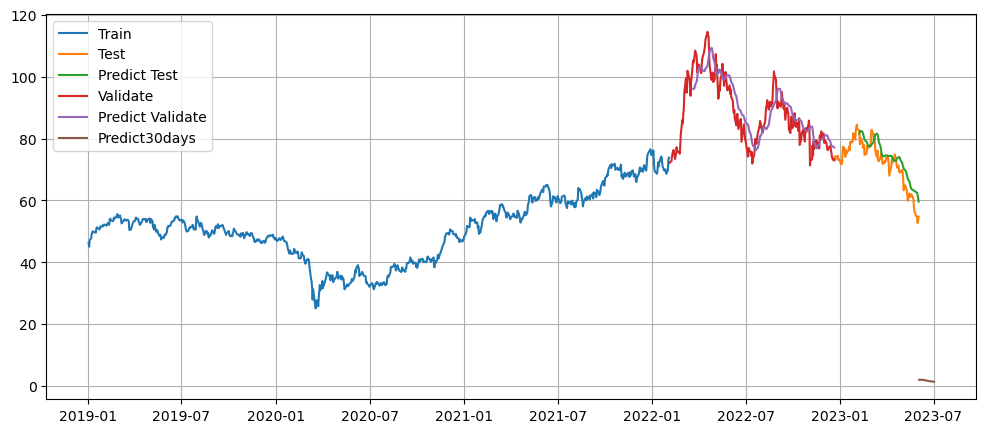

In [20]:
plt.figure(figsize=(12, 5))

# Tập train
plt.plot(df[:train_size].index, train_data)

# Tập test
plt.plot(df[train_size + val_size: ].index, test_data)

# Predict trên test
plt.plot(df[train_size + val_size + sequence_length + 1:].index, y_pred)

# Tập val
plt.plot(df[train_size : train_size + val_size].index, val_data)

# Predict trên tập Val
plt.plot(df[train_size + sequence_length + 1: train_size + val_size].index, y_pred_val)

# Dự đoán 30 ngày
plt.plot(index_next_30_days, y_next_30_days)

plt.legend(['Train', 'Test', 'Predict Test','Validate',  'Predict Validate', 'Predict30days'])
plt.grid()
plt.savefig('IS403_RNN_NTR_721.png')
plt.show()